# API
Application Programming Interface

In [10]:
from datetime import datetime, timedelta
from dotenv import load_dotenv
import plotly_express as px
import os, requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
function = "TIME_SERIES_INTRADAY"
interval = "60min"
stock_list = []

for symbol in symbols:
    url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval={interval}&apikey={api_key}'
    data = requests.get(url).json()
    df = pd.DataFrame(data[f"Time Series ({interval})"]).T
    series = df["4. close"].rename(symbol).astype(float) # use name of symbol, convert to float, overwrite df with series [4. close]
    stock_list.append(series) # append series to list

In [11]:
print(f"{len(stock_list) = }")

len(stock_list) = 4


In [12]:
stocks = pd.DataFrame(stock_list).T
stocks

,AAPL,NVDA,TSLA,IBM
2022-11-04 20:00:00,138.1200,141.75,209.05,137.000
2022-11-04 19:00:00,138.2300,141.60,208.19,136.550
2022-11-04 18:00:00,138.2138,141.64,208.25,NaN
2022-11-04 17:00:00,138.2400,141.29,207.59,137.000
2022-11-04 16:00:00,138.3900,141.80,207.53,137.000
...,...,...,...,...
2022-10-26 14:00:00,NaN,NaN,NaN,135.610
2022-10-26 13:00:00,NaN,NaN,NaN,135.350
2022-10-26 12:00:00,NaN,NaN,NaN,135.735
2022-10-26 11:00:00,NaN,NaN,NaN,135.280


In [13]:
px.line(stocks, x = stocks.index, y = symbols, labels = {"variable": "Stock", "value": "Value (USD)", "index": "Date"}, title = "Stocks in one week")

# Working with time series

In [14]:
stocks.index = pd.to_datetime(stocks.index)
print(stocks.index.dtype)

datetime64[ns]


In [15]:
stocks.head()

,AAPL,NVDA,TSLA,IBM
2022-11-04 20:00:00,138.1200,141.75,209.05,137.00
2022-11-04 19:00:00,138.2300,141.60,208.19,136.55
2022-11-04 18:00:00,138.2138,141.64,208.25,NaN
2022-11-04 17:00:00,138.2400,141.29,207.59,137.00
2022-11-04 16:00:00,138.3900,141.80,207.53,137.00


In [16]:
stocks.loc["2022-10-28"] # extracts all rows with date "2022-10-28", can also do "2022", "2022-10" etc.

,AAPL,NVDA,TSLA,IBM
2022-10-28 20:00:00,155.5714,138.7900,228.3500,NaN
2022-10-28 19:00:00,155.5415,138.8800,228.3500,138.52
2022-10-28 18:00:00,155.6812,138.7300,228.4457,NaN
2022-10-28 17:00:00,156.0406,138.8600,228.7000,138.53
2022-10-28 16:00:00,155.4516,138.3400,228.4500,138.53
2022-10-28 15:00:00,155.8659,137.1600,228.5600,138.73
2022-10-28 14:00:00,156.1903,136.9200,226.1550,138.51
2022-10-28 13:00:00,156.4864,137.3501,225.1600,138.33
2022-10-28 12:00:00,154.8227,136.1400,224.7200,138.04
2022-10-28 11:00:00,155.4766,134.4800,222.8000,138.37


In [17]:
stocks.sort_index().loc["2022-10-27":"2022-10-31"] # can also use slicing

,AAPL,NVDA,TSLA,IBM
2022-10-27 07:00:00,NaN,NaN,NaN,135.0100
2022-10-27 09:00:00,NaN,NaN,NaN,135.1500
2022-10-27 10:00:00,NaN,NaN,NaN,135.4000
2022-10-27 11:00:00,NaN,NaN,NaN,135.6300
2022-10-27 12:00:00,NaN,NaN,NaN,135.2200
2022-10-27 13:00:00,NaN,NaN,NaN,135.4200
2022-10-27 14:00:00,NaN,NaN,NaN,134.6400
2022-10-27 15:00:00,NaN,NaN,NaN,134.7100
2022-10-27 16:00:00,NaN,NaN,NaN,134.9100
2022-10-27 17:00:00,142.9324,130.2900,221.0000,134.5200


In [18]:
now = datetime.now()
last_week = (now-timedelta(7)).strftime("%Y-%m-%d")
now = str(now.date())

print(f"{last_week = }")
print(f"{now = }")

stocks.sort_index().loc[last_week:now]

last_week = '2022-10-31'
now = '2022-11-07'


,AAPL,NVDA,TSLA,IBM
2022-10-31 05:00:00,154.4233,136.73,225.88,NaN
2022-10-31 06:00:00,154.5232,137.01,225.82,NaN
2022-10-31 07:00:00,154.5431,137.10,225.95,NaN
2022-10-31 08:00:00,154.3535,137.99,227.30,138.1900
2022-10-31 09:00:00,153.5348,137.38,226.80,138.1069
...,...,...,...,...
2022-11-04 16:00:00,138.3900,141.80,207.53,137.0000
2022-11-04 17:00:00,138.2400,141.29,207.59,137.0000
2022-11-04 18:00:00,138.2138,141.64,208.25,NaN
2022-11-04 19:00:00,138.2300,141.60,208.19,136.5500


## `Subplots in 2x2 figure`

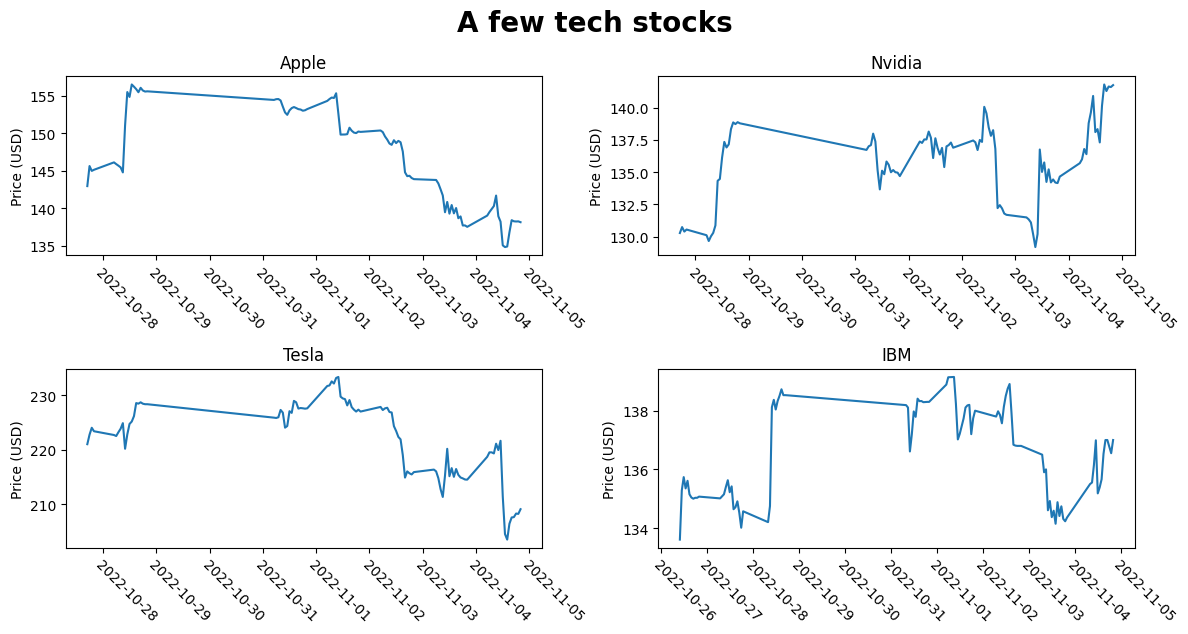

In [19]:
stock_names = {"AAPL": "Apple", "NVDA": "Nvidia", "TSLA": "Tesla", "IBM": "IBM"}

fig, axes = plt.subplots(2,2, figsize = (12, 6))

for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data = stocks, x = stocks.index, y = symbol, ax = ax)
    ax.set(title = f"{stock_names[symbol]}", ylabel = "Price (USD)")
    ax.tick_params(axis = "x", rotation = -45)
    plt.setp(ax.get_xticklabels(), ha="left", rotation_mode="anchor")

fig.tight_layout() # what exactly does this do?
fig.suptitle("A few tech stocks", y = 1.05, fontweight = "bold", fontsize = 20);

---
## Download CSV

In [20]:
# import time

# symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
# stock_list = []

# for symbol in symbols:
#     for function, time_column in zip(["TIME_SERIES_DAILY", "TIME_SERIES_INTRADAY_EXTENDED"], ["timestamp", "time"]):
#         url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}&datatype=csv&outputsize=full&interval=60min"

#         df = pd.read_csv(url)
#         df.set_index(df[time_column], inplace=True)
#         df.index = pd.to_datetime(df.index)
#         df.drop(time_column, axis=1, inplace=True)
#         df.to_csv(f"../Data/Stocksdata/{symbol}_{function}.csv")

#         # to not overload API
#         time.sleep(15)